In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import warnings

import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/buenos-aire-real-estate-1/buenos-aires-real-estate-1.csv


**Project Based on Predicting House Prices based on Size in Buenos Aires**

In this project, you're working for a client who wants to create a model that can predict the price of apartments in the city of Buenos Aires — with a focus on apartments that cost less than $400,000 USD.

I will have to import my data but first I will have to create a function named wrangle that takes a file path as an argument and returns a DataFrame

In [2]:
# The function should be based on the three conditions
# 1. predict the price of apartments
# 2. In the city of Buenos Aires
# 3. Specifically focusing on apartments < $ 400_000 USD
def wrangle (filepath):
    #Read CSV file into DataFrame
    df = pd.read_csv(filepath)
    
    # Subset to properties in "Capital Federal"
    mask_ba_cap_fed = df["place_with_parent_names"].str.contains("Capital Federal")
    
    # Subset to `apartments`
    mask_apat = df["property_type"] == "apartment"
    
    # Subset to properties where `price_aprox_usd < 400_000`
    mask_price_usd = df["price_aprox_usd"] < 400_000
    
    # Then combine the three conditions
    df = df[mask_ba_cap_fed & mask_apat & mask_price_usd]
    
    # Remove Outliers from our data
    df["surface_covered_in_m2"].quantile([0.1, 0.9])
    low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
    mask_area = df["surface_covered_in_m2"].between (low, high)
    df = df[mask_area]
    
    return df

In [3]:
# Load the dataset 
df = wrangle("/kaggle/input/buenos-aire-real-estate-1/buenos-aires-real-estate-1.csv")
print("df shape:", df.shape)
df.head()

df shape: (1343, 16)


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...


In [4]:
# Check your work
assert (
    len(df) <= 8606
), f"`df` should have no more than 8606 observations, not {len(df)}."

 Add to my `wrangle` function so that the DataFrame it returns only includes apartments in Buenos Aires (`"Capital Federal"`) that cost less than $400,000 USD

In [5]:
# Check your work
assert (
    len(df) <= 1781
), f"`df` should have no more than 1781 observations, not {len(df)}."

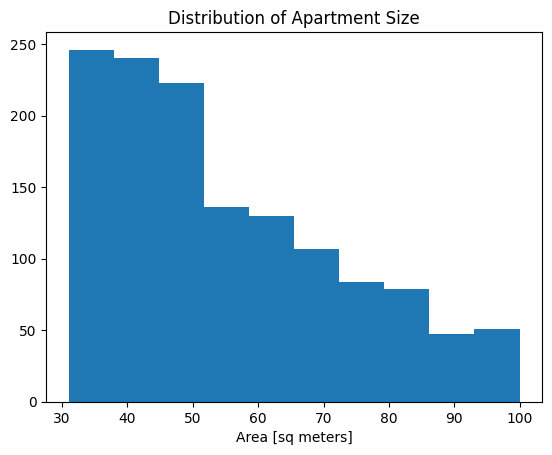

In [6]:
# Then explore the df by creating a histogram using matplotlib
plt.hist(df["surface_covered_in_m2"])
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Apartment Size");

From my histogram, I realize there is a lot of outliers. I can further use describe method to further understand the nature of the outliers

In [7]:
df["surface_covered_in_m2"].describe()

count    1343.000000
mean       55.076694
std        18.160427
min        31.000000
25%        40.000000
50%        50.000000
75%        68.500000
max       100.000000
Name: surface_covered_in_m2, dtype: float64

Add to my wrangle function so that it removes observations that are outliers in the "surface_covered_in_m2" column. Specifically, all observations should fall between the 0.1 and 0.9 quantiles for "surface_covered_in_m2".

In [8]:
# Check my work
assert len(df) <= 1343

Create a scatter plot that shows price ("price_aprox_usd") vs area ("surface_covered_in_m2") in our dataset. Make sure to label your x-axis "Area [sq meters]" and your y-axis "Price [USD]".

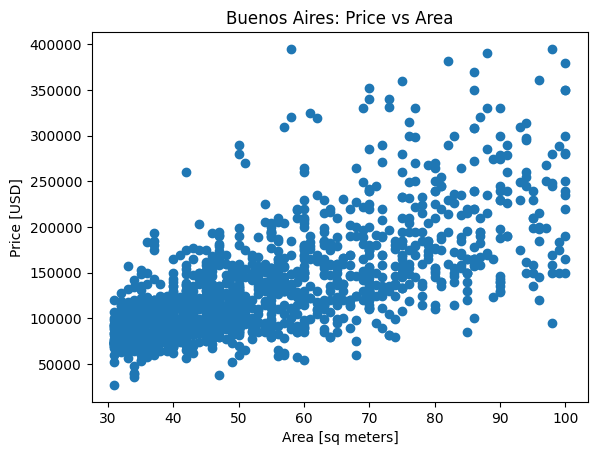

In [9]:
plt.scatter(x=df["surface_covered_in_m2"], y=df["price_aprox_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buenos Aires: Price vs Area");

This plot suggests that there's a moderate positive correlation between apartment price and size. This means that if thing we want to predict is price, size will be a good feature to include.

I will use **(Split).**
A key part in any model-building project is separating my target (the thing I want to predict) from my features (the information my model will use to make its predictions). Since this is our first model, I'll use just one feature: apartment size.

Create the feature matrix named X_train, which I'll use to train my model. It should contain one feature only: ["surface_covered_in_m2"]. Remember that my feature matrix should always be two-dimensional.

In [10]:
# Split Data: Feature Matrix
features = ["surface_covered_in_m2"]
X_train = df[features]
X_train.head()

,surface_covered_in_m2
4,70.0
9,42.0
29,54.0
40,42.0
41,50.0


In [11]:
# Check your work
assert X_train.shape == (
    1343,
    1,
), f"The shape of `X_train` should be (1343, 1), not {X_train.shape}."

In [12]:
# Split Data: Target Vector. My `Target Vector` is `price_aprox_usd`
target = "price_aprox_usd"
y_train = df[target]
y_train.shape

(1343,)

In [13]:
# Check your work
assert y_train.shape == (1343,)

**Building my model**

In [14]:
# The first process is baseline ( calculate the mean)
#Calculate the mean of your target vector y_train and assign it to the variable y_mean
y_mean = y_train.mean()
y_mean


135527.83871928515

Create a list named y_pred_baseline that contains the value of y_mean repeated so that it's the same length at y.

In [15]:
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[135527.83871928515,
 135527.83871928515,
 135527.83871928515,
 135527.83871928515,
 135527.83871928515]

Add a line to the plot below that shows the relationship between the observations X_train and our dumb model's predictions y_pred_baseline. Be sure that the line color is orange, and that it has the label "Baseline Model".

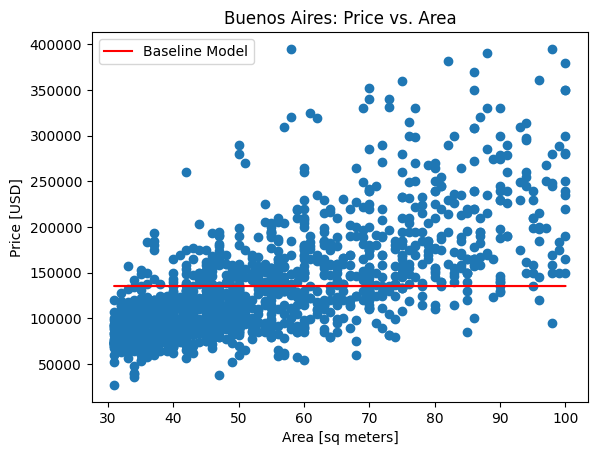

In [16]:
plt.plot(X_train.values, y_pred_baseline, color="red", label= "Baseline Model")
plt.scatter(X_train, y_train)
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buenos Aires: Price vs. Area")
plt.legend();

My baseline model doesn't really follow the trend in the data. I will have to use mean absolute error

Calculate the baseline mean absolute error for your predictions in y_pred_baseline as compared to the true targets in y.

In [17]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 135527.84
Baseline MAE: 45199.46


**Iterate**

In [18]:
# Instantiate Model
model = LinearRegression()

In [19]:
# Check your work
assert isinstance(model, LinearRegression)

In [20]:
# Fit your model to the data, X_train and y_train
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Check your work
check_is_fitted(model)

**Evaluate**

In [22]:
# Generate predictions using a trained model in scikit-learn.
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([169151.87330223, 106064.44707446, 133101.91545779, 106064.44707446,
       124089.42599668])

In [23]:
# Check your work
assert (
    len(y_pred_training) == 1343
), f"There should be 1343 predictions in `y_pred_training`, not {len(y_pred_training)}."

Calculate your training mean absolute error for your predictions in y_pred_training as compared to the true targets in y_train.

Calculate the mean absolute error for a list of predictions in scikit-learn.

In [24]:
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 31248.26


**Communicating my results**

In [25]:
# Extract the intercept from my model, and assign it to the variable intercept.
intercept = round(model.intercept_, 2)
print("Model Intercept:", intercept)
assert any([isinstance(intercept, int), isinstance(intercept, float)])

Model Intercept: 11433.31


Extract the coefficient associated "surface_covered_in_m2" in your model, and assign it to the variable coefficient.

In [26]:
coefficient = round(model.coef_[0], 2)
print('Model coefficient for "surface_covered_in_m2":', coefficient)
assert any([isinstance(coefficient, int), isinstance(coefficient, float)])

Model coefficient for "surface_covered_in_m2": 2253.12


Complete the code below and run the cell to print the equation that your model has determined for predicting apartment price based on size.

In [27]:
print(f"apt_price = {intercept} + {coefficient} * surface_covered")

apt_price = 11433.31 + 2253.12 * surface_covered


Add a line to the plot below that shows the relationship between the observations in X_train and my model's predictions y_pred_training. Be sure that the line color is red, and that it has the label "Linear Model"

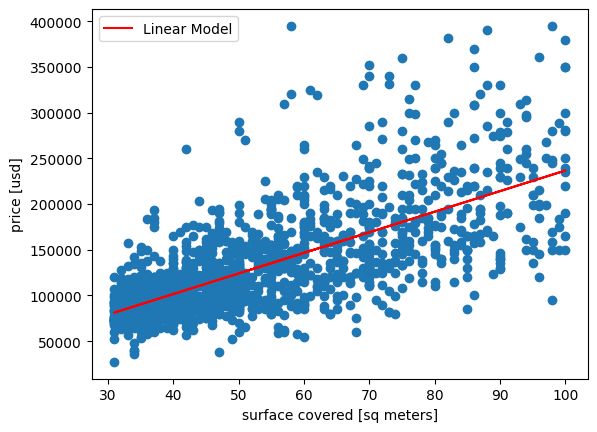

In [28]:
plt.plot(X_train.values, model.predict(X_train), color='red', label='Linear Model')
plt.scatter(X_train, y_train)
plt.xlabel("surface covered [sq meters]")
plt.ylabel("price [usd]")
plt.legend();